# Stats on stylistic features per community

In [1]:
import pandas as pd

# Load data
communities = [
    'voltron',
    'bts',
    'studyblr',
    'miraculous_ladybug',
    'riverdale',
    'south_park',
    'svtfoe',
    'simblr',
    'writers_on_tumblr',
    'steven_universe',
]

data = {}
for community in communities:
#     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
    data[community] = pd.read_pickle(f'../../data/textposts_captions/{community}.pkl')

In [2]:
features = set()
for community in communities:
    row_features = data[community]['style_features'].map(lambda x: x.keys())
    community_features = set([f for feats in row_features for f in feats])
    features |= community_features
    
print(len(features))
features

437


{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'avg_capitalized_letters',
 'avg_capitalized_words',
 'avg_oov',
 'avg_punctuation',
 'n_capitals',
 'n_characters',
 'n_oov',
 'n_words',
 'repeated_\t',
 'repeated_\n',
 'repeated_\r',
 'repeated_ ',
 'repeated_!',
 'repeated_#',
 'repeated_$',
 'repeated_%',
 'repeated_(',
 'repeated_)',
 'repeated_*',
 'repeated_+',
 'repeated_,',
 'repeated_-',
 'repeated_.',
 'repeated_/',
 'repeated_0',
 'repeated_1',
 'repeated_2',
 'repeated_3',
 'repeated_4',
 'repeated_5',
 'repeated_6',
 'repeated_7',
 'repeated_8',
 'repeated_9',
 'repeated_:',
 'repeated_;',
 'repeated_=',
 'repeated_>',
 'repeated_?',
 'repeated_@',
 'repeated_[',
 'repeated_\\',
 'repeated_^',
 'repeated__',
 'repeated_a',
 'repeated_b',
 'repeated_c',
 'repeated_d',
 'repeated_e',
 'repeated_f',
 'repeated_g',
 'repeated_h',
 'repeated_i',
 'repeated_j

In [3]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_avgs = {f: {} for f in features}

for c in tqdm(communities):
    for f in features:
        feature_values = data[c]['style_features'].map(lambda x: x.get(f, 0))
        feature_avgs[f][c] = np.mean(feature_values)

In [4]:
# Select features with highest std dev among feature averages across communities

pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    line = [f]
    for c in communities:
        line.append(feature_avgs[f][c])
    line.append(np.std(line[-1*len(communities):]))
        
    lines.append(line)
    
avgs = pd.DataFrame(lines, columns=['feature', *[c for c in communities], 'std_dev']).sort_values('std_dev', ascending=False).reset_index(drop=True)
selected_features = avgs['feature'].loc[:10].tolist()
print(selected_features)

avgs

['n_characters', 'n_words', 'n_oov', '.', ',', '?', '"', ':', '-', '#', '!']


,feature,voltron,bts,studyblr,miraculous_ladybug,riverdale,south_park,svtfoe,simblr,writers_on_tumblr,steven_universe,std_dev
0,n_characters,326.600993,661.482215,335.239281,258.119230,342.317990,133.290158,159.529059,324.472033,756.755407,343.858782,1.880591e+02
1,n_words,69.063641,141.608252,68.491333,54.013844,72.931525,28.077800,33.673130,67.863068,159.963573,69.224971,4.018635e+01
2,n_oov,21.835255,42.480395,21.445027,17.724580,22.277135,9.989605,11.583849,25.338605,45.368770,22.949476,1.097707e+01
3,.,2.834846,6.749298,2.794999,2.140574,3.438833,0.952067,1.281076,2.748739,7.925086,3.024308,2.121640e+00
4,",",2.472603,5.806965,2.270833,1.792742,2.585210,0.769161,0.986252,2.121992,6.959451,2.537158,1.890090e+00
5,?,0.727572,1.437248,0.703991,0.636772,0.848300,0.320776,0.419610,1.152749,1.546691,0.774511,3.839556e-01
6,"""",0.670111,0.032778,0.505845,0.017078,0.614995,0.009232,0.722435,0.005398,0.390300,0.099789,2.876791e-01
7,:,0.837195,1.174217,0.646325,1.040673,0.602512,0.932893,0.525967,1.302810,0.589916,0.810338,2.510686e-01
8,-,0.425543,0.709674,0.633684,0.503374,0.400773,0.419324,0.288597,0.945988,0.890795,0.660169,2.070366e-01
9,#,0.040393,0.125333,0.473219,0.028898,0.103917,0.010858,0.327167,0.074471,0.500830,0.502295,1.975550e-01


In [5]:
# Reformat for seaborn plotting
pd.set_option('display.max_rows', 999)

lines = []
for f in features:
    for c in communities:
        line = [f, c, feature_avgs[f][c]]
        lines.append(line)
    
feat_values = pd.DataFrame(lines, columns=['feature', 'community', 'value'])
feat_values

,feature,community,value
0,repeated_í,voltron,0.000000
1,repeated_í,bts,0.000000
2,repeated_í,studyblr,0.000004
3,repeated_í,miraculous_ladybug,0.000000
4,repeated_í,riverdale,0.000000
5,repeated_í,south_park,0.000000
6,repeated_í,svtfoe,0.000000
7,repeated_í,simblr,0.000000
8,repeated_í,writers_on_tumblr,0.000000
9,repeated_í,steven_universe,0.000000


Text(0.5, 1.0, 'Top 3 aggregate features')

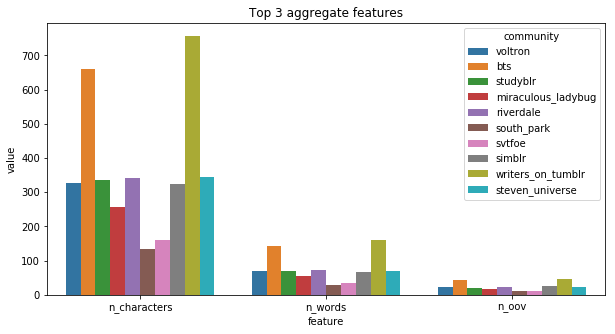

In [7]:
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[:3]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(10,5))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title("Top 3 aggregate features")

Text(0.5, 1.0, 'Top 10 specific features')

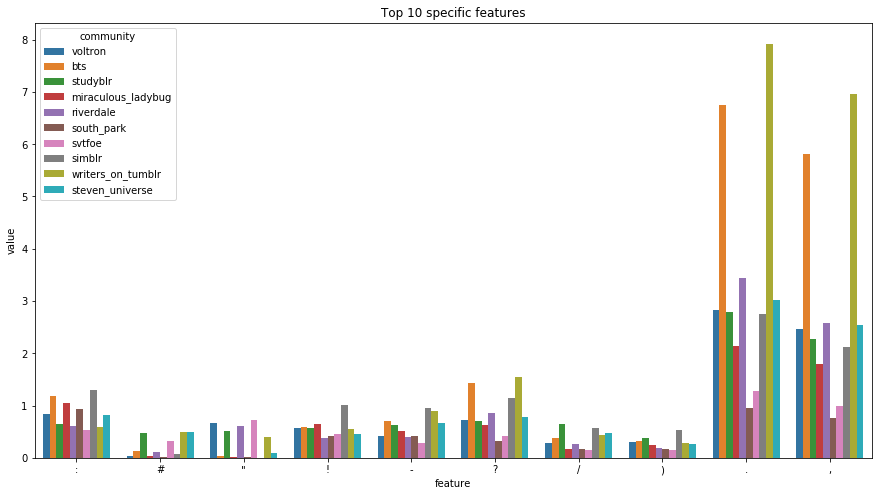

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
# sns.barplot(x='feature', hue=avgs.columns[1:-1], data=avgs.iloc[:10])
selected_features = avgs.iloc[3:13]['feature'].tolist()
selected_data = feat_values[feat_values['feature'].isin(selected_features)]

plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='value', hue='community', data=selected_data).set_title('Top 10 specific features')

## Compare feature variation across text posts and captions

In [9]:
data['bts'].columns

Index(['post_tags_string', 'post_id', 'activity_time_epoch', 'tumblelog_id',
       'is_private', 'post_title', 'post_short_url', 'post_slug', 'post_type',
       'post_caption', 'post_format', 'post_note_count', 'post_tags',
       'post_content', 'reblogged_from_post_id', 'reblogged_from_metadata',
       'created_time_epoch', 'updated_time_epoch', 'is_submission', 'mentions',
       'source_title', 'source_url', 'post_classifier', 'blog_classifier',
       'activity_date', 'post_body', 'post_body_no_blognames', 'text_type',
       'style_features'],
      dtype='object')

In [11]:
# Separate text posts and captions

textposts = {}
captions = {}

for community in communities:
#     data[community] = pd.read_pickle(f'../../data/{community}_posts.pkl')
    textposts[community] = data[community][data[community]['text_type'] == 'text post']
    captions[community] = data[community][data[community]['text_type'] == 'caption']
    
    print(f'{community} text posts: {len(textposts[community])}, captions: {len(captions[community])}')

voltron text posts: 119327, captions: 88431
bts text posts: 83485, captions: 196672
studyblr text posts: 116428, captions: 130946
miraculous_ladybug text posts: 77881, captions: 258511
riverdale text posts: 148931, captions: 106533
south_park text posts: 35919, captions: 255674
svtfoe text posts: 16143, captions: 98349
simblr text posts: 116704, captions: 305112
writers_on_tumblr text posts: 125344, captions: 74564
steven_universe text posts: 177034, captions: 233402


In [12]:
# Create dataframe to compare average feature values across text types

lines = []

# Textposts
for community in tqdm(communities[:1]):
    for f in features:
        textposts[f] = textposts[c]['style_features'].map(lambda x: x.get(f, 0))
        lines.extend(list(zip(textposts[c]['text_type'], [f] * len(textposts[c]), textposts[f])))
        
feature_values = pd.DataFrame(lines, columns=['text_type', 'feature', 'feature_value'])

In [13]:
feature_values.shape

(77363858, 3)

In [17]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_avgs = {f: {} for f in features}

for d, text_type in zip([textposts, captions], ['text_post', 'caption']):
    for f in tqdm(features):
        feature_values = []
        for c in communities:
            feature_values.extend(d[c]['style_features'].map(lambda x: x.get(f, 0)))
        feature_avgs[f][text_type] = np.mean(feature_values)

In [22]:
feature_avgs_df = pd.DataFrame(feature_avgs).T
feature_avgs_df['diff'] = np.abs(feature_avgs_df['caption'] - feature_avgs_df['text post'])
feature_avgs_df.sort_values('diff', ascending=False, inplace=True)
feature_avgs_df

,caption,text post,diff
n_characters,1.465921e+02,7.280035e+02,5.814114e+02
n_words,3.025291e+01,1.532999e+02,1.230470e+02
n_oov,1.214450e+01,4.481073e+01,3.266622e+01
.,1.064953e+00,7.193681e+00,6.128728e+00
",",8.196087e-01,6.093072e+00,5.273463e+00
?,3.373035e-01,1.793278e+00,1.455974e+00
-,4.615901e-01,8.967131e-01,4.351230e-01
!,4.696149e-01,8.054161e-01,3.358011e-01
"""",3.446625e-01,3.983205e-02,3.048305e-01
#,3.108396e-01,3.120736e-02,2.796323e-01


In [29]:
feature_avgs_df['feature'] = feature_avgs_df.index
feature_avgs_df

,caption,text post,diff,feature
n_characters,1.465921e+02,7.280035e+02,5.814114e+02,n_characters
n_words,3.025291e+01,1.532999e+02,1.230470e+02,n_words
n_oov,1.214450e+01,4.481073e+01,3.266622e+01,n_oov
.,1.064953e+00,7.193681e+00,6.128728e+00,.
",",8.196087e-01,6.093072e+00,5.273463e+00,","
?,3.373035e-01,1.793278e+00,1.455974e+00,?
-,4.615901e-01,8.967131e-01,4.351230e-01,-
!,4.696149e-01,8.054161e-01,3.358011e-01,!
"""",3.446625e-01,3.983205e-02,3.048305e-01,""""
#,3.108396e-01,3.120736e-02,2.796323e-01,#


In [31]:
plot_data = feature_avgs_df.iloc[:3].drop(columns=['diff'])
plot_data

,caption,text post,feature
n_characters,146.592121,728.003532,n_characters
n_words,30.252910,153.299886,n_words
n_oov,12.144505,44.810726,n_oov


In [35]:
plot_data = plot_data.melt(id_vars=['feature'], var_name=['text_type'], value_name='feature_avg')
plot_data

,feature,text_type,feature_avg
0,n_characters,caption,146.592121
1,n_words,caption,30.252910
2,n_oov,caption,12.144505
3,n_characters,text post,728.003532
4,n_words,text post,153.299886
5,n_oov,text post,44.810726


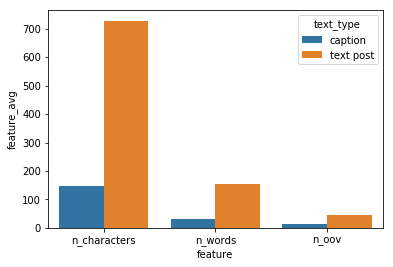

In [36]:
import seaborn as sns

sns.barplot(x='feature', y='feature_avg', hue='text_type', data=plot_data)

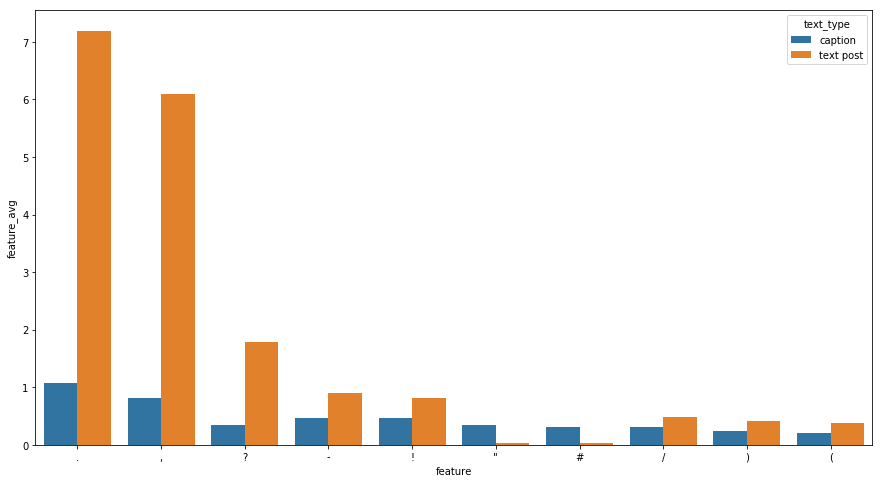

In [39]:
plot_data = feature_avgs_df.iloc[3:13].drop(columns=['diff'])
plot_data = plot_data.melt(id_vars=['feature'], var_name=['text_type'], value_name='feature_avg')
plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='feature_avg', hue='text_type', data=plot_data)

## Compare feature variation across text posts and captions, within communities

In [42]:
# Get feature averages

import numpy as np
from tqdm import tqdm_notebook as tqdm

feature_comm_avgs = {f: {c: {} for c in communities} for f in features}

for d, text_type in zip([textposts, captions], ['text_post', 'caption']):
    for f in tqdm(features):
        for c in communities:
            feature_values = d[c]['style_features'].map(lambda x: x.get(f, 0))
            feature_comm_avgs[f][c][text_type] = np.mean(feature_values)

In [45]:
feat_comm_avgs = pd.DataFrame.from_dict({(f,c): feature_comm_avgs[f][c] 
                                        for f in feature_comm_avgs.keys()
                                        for c in feature_comm_avgs[f].keys()},
                                        orient='index')
feat_comm_avgs

text_post     caption
!                       bts                    1.627179    0.161721
                        miraculous_ladybug     1.004558    0.537788
                        riverdale              0.562274    0.121371
                        simblr                 0.911254    1.053456
                        south_park             0.680392    0.380219
                        steven_universe        0.578188    0.377619
                        studyblr               0.746745    0.395697
                        svtfoe                 1.032026    0.350476
                        voltron                0.772323    0.293766
                        writers_on_tumblr      0.738280    0.243884
"                       bts                    0.081859    0.011944
                        miraculous_ladybug     0.046468    0.008224
                        riverdale              0.040730    1.417805
                        simblr                 0.007223    0.004700
                        south_park             0.026476    0.006809
                        steven_universe        0.030124    0.152629
                        studyblr               0.023517    0.934698
                        svtfoe                 0.040575    0.834355
                        voltron                0.051447    1.504925
                        writers_on_tumblr      0.058551    0.947978
#                       bts                    0.037683    0.162540
                        miraculous_ladybug     0.015729    0.032865
                        riverdale              0.017619    0.224560
                        simblr                 0.027283    0.092520
                        south_park             0.014477    0.010349
                        steven_universe        0.060621    0.837302
                        studyblr               0.032827    0.864784
                        svtfoe                 0.018274    0.377869
                        voltron                0.016652    0.072429
                        writers_on_tumblr      0.033580    1.286291
$                       bts                    0.013775    0.000803
                        miraculous_ladybug     0.003531    0.002356
                        riverdale              0.003129    0.004186
                        simblr                 0.014275    0.014650
                        south_park             0.008463    0.004447
                        steven_universe        0.037411    0.010505
                        studyblr               0.019918    0.004124
                        svtfoe                 0.007310    0.003162
                        voltron                0.004450    0.001300
                        writers_on_tumblr      0.008576    0.004198
%                       bts                    0.021405    0.002451
                        miraculous_ladybug     0.011890    0.004460
                        riverdale              0.015376    0.001277
                        simblr                 0.018988    0.011835
                        south_park             0.008742    0.003309
                        steven_universe        0.032852    0.015574
                        studyblr               0.029881    0.012853
                        svtfoe                 0.011708    0.003152
                        voltron                0.013040    0.001414
                        writers_on_tumblr      0.011879    0.003447
&                       bts                    0.071222    0.016988
                        miraculous_ladybug     0.020082    0.019125
                        riverdale              0.050473    0.032553
                        simblr                 0.044180    0.112477
                        south_park             0.038086    0.010502
                        steven_universe        0.067083    0.037142
                        studyblr               0.055734    0.053648
                        svtfoe                 0.024469    0.013188
                        voltron   

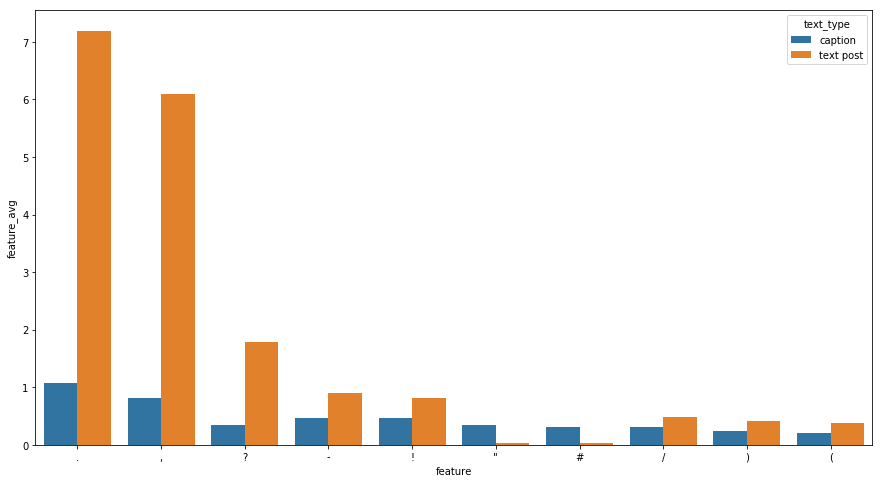

In [39]:
top3_feats = feature_avgs_df.iloc[:3]['feature'].tolist()
top10 = feature_avgs_df.iloc[3:13]['feature'].tolist()

plot_data = feat_comm_avgs.loc[feat_comm_avgs['feature'].isin(top3_feats)].drop(columns=['diff'])
plot_data = plot_data.melt(id_vars=['feature'], var_name=['text_type'], value_name='feature_avg')
plt.figure(figsize=(15,8))
sns.barplot(x='feature', y='feature_avg', hue='text_type', data=plot_data)